In [4]:
# 필요한 라이브러리 설치
!pip install soundata pandas librosa plotly matplotlib mutagen pillow tensorflow[and-cuda]==2.15 scikit-learn 

  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached nvidia_cublas_cu12-12.2.5.6-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.2.142-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.2.140-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.2.1

In [5]:
!pip install tensorflow[and-cuda]==2.13


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
# 데이터 다운로드
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data


INFO: Downloading ['all', 'index']. Index is being stored in /home/jovyan/.local/lib/python3.10/site-packages/soundata/datasets/indexes, and the rest of files in /home/jovyan/sound_datasets/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /home/jovyan/sound_datasets/urbansound8k/audio already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/metadata already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /home/jovyan/sound_datasets/urbansound8k/FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: [index] downloading urbansoun

Clip(
  audio_path="/home/jovyan/sound_datasets/urbansound8k/audio/fold6/108638-9-0-0.wav",
  clip_id="108638-9-0-0",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_

In [14]:
import numpy as np
import pandas as pd
import os
import librosa
import plotly.express as px
import matplotlib.pyplot as plt
import mutagen
from PIL import Image
from tqdm import tqdm
import gc

## 데이터확인

In [3]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
test_file = '/home/jovyan/sound_datasets/urbansound8k/audio/fold5/100263-2-0-117.wav'
home_directory = '/home/jovyan/sound_datasets/urbansound8k/'

y, sr = librosa.load(test_file)

print('Sample rate: ' + str(sr))

Sample rate: 22050


In [4]:
import numpy as np
import pandas as pd
import os
import librosa
import plotly.express as px
import matplotlib.pyplot as plt
import mutagen
from PIL import Image
from tqdm import tqdm

In [5]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/home/jovyan/sound_datasets/urbansound8k/audio/', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [6]:
dataset_df = create_dataset_df('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
dataset_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class,filepath
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,/home/jovyan/sound_datasets/urbansound8k/audio...
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,/home/jovyan/sound_datasets/urbansound8k/audio...


In [7]:
dataset_df.groupby('class').slice_file_name.count()


class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
Name: slice_file_name, dtype: int64

In [8]:
# 데이터의 평균길이
dataset_df['duration'] = dataset_df['end'] - dataset_df['start']
dataset_df['duration'].describe()

count    8732.000000
mean        3.607904
std         0.973570
min         0.054517
25%         4.000000
50%         4.000000
75%         4.000000
max         4.000000
Name: duration, dtype: float64

In [9]:
test_file = '/home/jovyan/sound_datasets/urbansound8k/audio/fold5/100263-2-0-117.wav'
home_directory = '/home/jovyan/sound_datasets/urbansound8k/'

y, sr = librosa.load(test_file)

print('Sample rate: ' + str(sr))

Sample rate: 22050


# 데이터 전처리

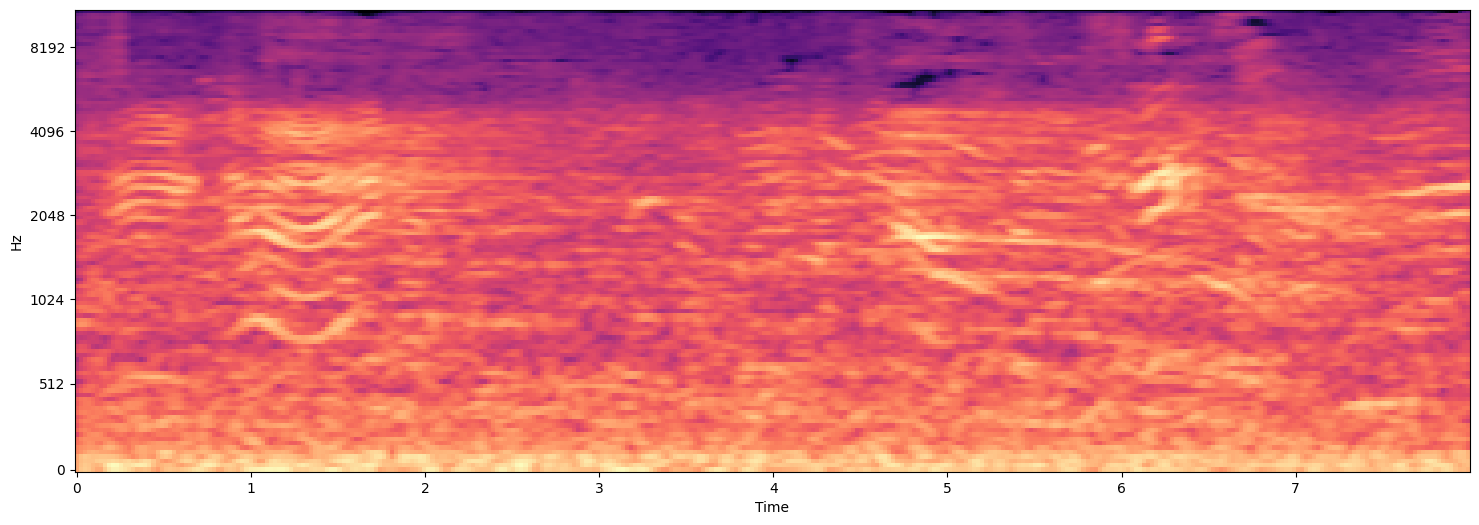

In [10]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.show()

In [11]:
# 함수정의

# 오디오 신호 시간대 맞추기
def load_audio(file_name):
    y, sr = librosa.load(file_name)
    # 오디오 신호의 시작과 끝의 정적인 소음 제거
    yt, index = librosa.effects.trim(y, top_db=20)       

    # 4초로 맞추기
    if len(yt) > (sr*4):
        yt = yt[:(sr*4)]
    else:
        padding = (sr*4) - len(yt)
        offset = padding // 2
        yt = np.pad(yt, (offset, (sr*4) - len(yt) - offset), 'constant')
  
    return yt

# mel처리하는 코드 -> 특징의 평균값 반환
def features_extractor(file):
    audio, sr = librosa.load(file_name) 
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    return mel_scaled_features
    

    # mel_scaled_features = np.mean(mel_features.T,axis=0) # 1차원배열로 반환 -> cnn에 알맞지 않음
    # mel_scaled_features = mel_features.T # 2차원배열로 반환(n_mels, n_frames)
    # return mel_scaled_features

In [12]:
# 함수정의

# 오디오 신호 시간대 맞추기
def load_audio(file_name):
    y, sr = librosa.load(file_name)
    # 오디오 신호의 시작과 끝의 정적인 소음 제거
    yt, index = librosa.effects.trim(y, top_db=20)       

    # 4초로 맞추기
    if len(yt) > (sr*4):
        yt = yt[:(sr*4)]
    else:
        padding = (sr*4) - len(yt)
        offset = padding // 2
        yt = np.pad(yt, (offset, (sr*4) - len(yt) - offset), 'constant')
  
    return yt

# mel처리하는 코드 -> 특징의 평균값 반환
def features_extractor(file):
    audio, sr = librosa.load(file_name) 
    mel_features = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
    mel_scaled_features = librosa.power_to_db(mel_features, ref=np.max)
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_scaled_features, sr=sr, x_axis='time', y_axis='mel')
    
    base_name = os.path.basename(file).replace('.wav', '.png')
    plt.savefig(f'./mel/{base_name}', bbox_inches='tight', pad_inches=0)
    plt.close()
    
    return mel_scaled_features
    

    # mel_scaled_features = np.mean(mel_features.T,axis=0) # 1차원배열로 반환 -> cnn에 알맞지 않음
    # mel_scaled_features = mel_features.T # 2차원배열로 반환(n_mels, n_frames)
    # return mel_scaled_features

In [ ]:
# 모든 오디오 파일에 대한 mel 추출
audio_dataset_path= '/home/jovyan/sound_datasets/urbansound8k/afudio/'
extracted_features=[]
metadata = pd.read_csv('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    final_class_labels=row["class"]
    
    # pre_data = load_audio(file_name)
    data=features_extractor(file_name) # ParameterError: Audio data must be floating-point 에러가 가끔 발생함
    extracted_features.append([data,final_class_labels])

    # 메모리 정리
    del data
    gc.collect()
 
# 데이터프레임으로 확인하기
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

3555it [3:29:27,  6.81s/it]/home/jovyan/.local/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
4016it [4:24:28,  6.05s/it]

In [ ]:
sound_dic = {
    'air_conditioner':'0',
    'car_horn':'1',
    'children_playing':'2',
    'dog_bark':'3',
    'drilling':'4',
    'engine_idling':'5',
    'gun_shot':'6',
    'jackhammer':'7',
    'siren':'8',
    'street_musics':'9'
}
extracted_features_df['class_id'] = extracted_features_df['class'].map(sound_dic)

X=np.array(extracted_features_df['feature']) # shape = (8732, 128)
y=np.array(extracted_features_df['class_id'])

print(X)

In [ ]:
# 멜 스펙트로그램
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=256, n_mels=128)
Sdb = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
plt.show()

In [ ]:
# 모든 오디오 파일에 대한 mel 추출
audio_dataset_path= '/home/jovyan/sound_datasets/urbansound8k/audio/'
extracted_features=[]
metadata = pd.read_csv('/home/jovyan/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv')
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path,'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    
    final_class_labels=row["class"]
    
    # pre_data = load_audio(file_name)
    data=features_extractor(file_name) # ParameterError: Audio data must be floating-point 에러가 가끔 발생함
    extracted_features.append([data,final_class_labels])
 
# 데이터프레임으로 확인하기
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/content/drive/MyDrive/feature_file3.csv'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 10  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # 모델 컴파일
    return model

# 데이터셋 준비
# X_data = X  # 이미지 데이터 배열 # data_directory['feature']
# y_data = y # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# # 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
# for filename in os.listdir(data_directory):
#     if filename.endswith('.png'):  # PNG 파일만 처리
#         # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
#         class_number = filename.split('_')[0]
#         # 이미지 파일 경로 설정
#         img_path = os.path.join(data_directory, filename)
#         # 이미지 불러오기 및 전처리
#         img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
#         img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
#         X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
#         y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X)
y_data = np.array(y)

# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

# 콜백 정의: 최적의 가중치를 저장하는 체크포인트 및 조기 종료
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',  # 저장할 파일명 수정
    monitor='val_loss',  # 검증 손실 기준으로 최적 모델 판단
    save_best_only=True,  # 최적의 모델만 저장
    mode='min'  # 검증 손실이 가장 작을 때 갱신
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # 검증 손실 기준으로 조기 종료
    patience=5,  # 5번의 에포크 동안 개선되지 않으면 종료
    mode='min'  # 검증 손실이 가장 작을 때 종료
)

# 모델 학습
history = model.fit(
    X_train, y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint_callback, early_stopping_callback]  # 콜백 추가
)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# 전체 모델 저장
model.save('final_model.keras')  # 전체 모델 저장

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)


In [ ]:
sound_dic = {
    'air_conditioner':'0',
    'car_horn':'1',
    'children_playing':'2',
    'dog_bark':'3',
    'drilling':'4',
    'engine_idling':'5',
    'gun_shot':'6',
    'jackhammer':'7',
    'siren':'8',
    'street_music':'9'
}
extracted_features_df['class_id'] = extracted_features_df['class'].map(sound_dic)

X=np.array(extracted_features_df['feature']) # shape = (8732, 128)
y=np.array(extracted_features_df['class_id'])

print(X)

# CNN

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import time

# 전체 코드 실행 시작 시간 기록
overall_start_time = time.time()
print(f"시작 시간: {time.ctime(overall_start_time)}")

# 데이터 디렉토리 설정
data_directory = '/content/drive/MyDrive/feature_file3.csv'  # 멜 스펙트로그램 데이터 디렉토리 경로

# 이미지 크기 및 하이퍼파라미터 설정
img_height, img_width = 64, 64  # 이미지 크기 설정 (64x64)
batch_size = 34  # 배치 크기 설정
epochs = 50  # 학습 에포크 수 설정
num_classes = 10  # 클래스 수 설정 (babycry, boil, carhorn 등 총 9개 클래스)

# CNN 모델 정의 함수
def create_cnn_model(input_shape, num_classes):
    """
    CNN 모델 생성 함수
    Args:
    - input_shape: 입력 이미지의 형태 (높이, 너비, 채널 수)
    - num_classes: 분류할 클래스 수
    Returns:
    - Sequential로 구성된 CNN 모델
    """
    model = Sequential([
        Input(shape=input_shape),  # 첫 번째 입력 레이어
        Conv2D(16, (3, 3), activation='relu'),  # 첫 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
        Conv2D(32, (3, 3), activation='relu'),  # 두 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 두 번째 풀링 레이어
        Conv2D(64, (3, 3), activation='relu'),  # 세 번째 컨볼루션 레이어 (필터 수 축소)
        MaxPooling2D((2, 2)),  # 세 번째 풀링 레이어
        Flatten(),  # 평탄화 레이어
        Dense(128, activation='relu'),  # 완전 연결 레이어
        Dropout(0.5),  # 드롭아웃 레이어 (과적합 방지)
        Dense(num_classes, activation='softmax')  # 출력 레이어 (클래스 수만큼 노드)
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])  # 모델 컴파일
    return model

# 데이터셋 준비
# X_data = X  # 이미지 데이터 배열 # data_directory['feature']
# y_data = y # 레이블 배열 # data_dirctory['class_id'] -> 딕셔너리 만들어서 숫자로 배당....?

# # 데이터 디렉토리에서 이미지 파일을 불러와서 리스트에 추가
# for filename in os.listdir(data_directory):
#     if filename.endswith('.png'):  # PNG 파일만 처리
#         # 클래스 번호 추출 (파일명에서 첫 번째 요소를 추출)
#         class_number = filename.split('_')[0]
#         # 이미지 파일 경로 설정
#         img_path = os.path.join(data_directory, filename)
#         # 이미지 불러오기 및 전처리
#         img = load_img(img_path, target_size=(img_height, img_width))  # 이미지 로드 및 크기 조정
#         img_array = img_to_array(img) / 255.0  # 이미지를 배열로 변환 및 정규화
#         X_data.append(img_array)  # 이미지 배열을 X_data 리스트에 추가
#         y_data.append(class_number)  # 클래스 번호를 y_data 리스트에 추가

# 리스트를 numpy 배열로 변환
X_data = np.array(X)
y_data = np.array(y)



In [ ]:
y_data = y_data.astype(int)

In [ ]:
# 클래스 번호를 원-핫 인코딩
y_data = to_categorical(y_data, num_classes)

In [ ]:
# 데이터셋을 학습 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# (X_train[0] == X_train[1]).all() # True

In [ ]:
# CNN 모델 생성
model = create_cnn_model((img_height, img_width, 3), num_classes)

# 콜백 정의: 최적의 가중치를 저장하는 체크포인트 및 조기 종료
checkpoint_callback = ModelCheckpoint(
    'best_model.keras',  # 저장할 파일명 수정
    monitor='val_loss',  # 검증 손실 기준으로 최적 모델 판단
    save_best_only=True,  # 최적의 모델만 저장
    mode='min'  # 검증 손실이 가장 작을 때 갱신
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # 검증 손실 기준으로 조기 종료
    patience=5,  # 5번의 에포크 동안 개선되지 않으면 종료
    mode='min'  # 검증 손실이 가장 작을 때 종료
)

# 모델 학습
history = model.fit(
    X_train[0], y_train,  # 학습 데이터와 레이블
    epochs=epochs,  # 학습 에포크 수
    batch_size=batch_size,  # 배치 크기
    validation_split=0.2,  # 학습 데이터의 20%를 검증 데이터로 사용
    callbacks=[checkpoint_callback, early_stopping_callback]  # 콜백 추가
)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)  # 테스트 데이터로 모델 평가
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")  # 평가 결과 출력

# 예측 및 성능 평가
Y_pred = model.predict(X_test)  # 테스트 데이터로 예측 수행
y_pred = np.argmax(Y_pred, axis=1)  # 예측된 클래스 라벨
y_true = np.argmax(y_test, axis=1)  # 실제 클래스 라벨

# 성능 보고서 및 혼동 행렬 출력
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(num_classes)]))  # 분류 보고서 출력
print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))  # 혼동 행렬 출력

# 전체 모델 저장
model.save('final_model.keras')  # 전체 모델 저장

# 전체 코드 실행 종료 시간 기록
overall_end_time = time.time()
print(f"종료 시간: {time.ctime(overall_end_time)}")
print(f"소요 시간: {overall_end_time - overall_start_time:.2f}초")

# 학습 곡선 시각화
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 손실
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 학습 곡선 출력
plot_history(history)
